In [73]:
import scipy.stats as ss
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
tab0 = Table.read('../Sampling/FullSample.fits')
tab1 = Table.read('../LumMatch/LumMatch.fits')
tab0.columns

<TableColumns names=('sdss_name','Plate','MJD','FiberID','ThingID','z_dr12','snr_1700','snr_spec','bal_flag_vi','bi_civ','err_bi_civ','ai_civ','err_ai_civ','vmin_civ_450','fwhm_civ','rewe_civ','err_rewe_civ','f1450','alpha_civ','alpha_nv','alpha_all','alphae_all','alpha_allc','alphae_allc','rew_gf','rewe_gf','rewsnr_gf','rew_gfc','rew_gfw','qflag','fwhm_gf','fwhme_gf','fwhmsnr_gf','fwhm_gfc','fwhm_gfw','sigma_gf','peak_gf','peaksnr_gf','rat_gf','wcent_gf','wciv0_gf','wcore_gf','wcoree_gf','shift_gf','asy_gf','kurt75_gf','kurt80_gf','rew_di','rewe_di','fwhm_di','peak_di','wciv_di','rew_nv','frat_nv/civ','crat_nv/civ','scale','nvflag','ABg','ABg_err','ABr','ABr_err','ABi','ABi_err','ABz','ABz_err','Mi','ABw1','ABw1_snr','ABw2','ABw2_snr','ABw3','ABw3_snr','ABw4','ABw4_snr','r-z','i-w1','i-w3','r-w3','i-w4','r-w4','w3-w4','uniform','boss_tar1','anc_tar1','anc_tar2','sdss_dr7','cc_flags','ABy','ABy_err','ABj','ABj_err','ABh','ABh_err','ABk','ABk_err','first_matched','first_flux','first_snr

In [74]:
iw3 = tab0['i-w3']
rw3 = tab0['r-w3']
rz = tab0['r-z']
rew = tab0['rew_gf']
kt80 = tab0['kurt80_gf']
fwhm = tab0['fwhm_gf']
frat = tab0['frat_nv/civ']
asy= tab0['asy_gf']
bal = tab0['bal_flag_vi']
iz = iw3 - rw3 + rz

In [75]:
# LM sample
iw3_L = tab1['i-w3']
rw3_L = tab1['r-w3']
rz_L = tab1['r-z']
rew_L = tab1['rew_gf']
kt80_L = tab1['kurt80_gf']
fwhm_L = tab1['fwhm_gf']
frat_L = tab1['frat_nv/civ']
asy_L = tab1['asy_gf']
bal_L = tab1['bal_flag_vi']
iz_L = iw3_L - rw3_L + rz_L

In [76]:
#  ERQ sample
erq0 = iw3>4.6
iw3_erq0 = iw3[erq0]
rew_erq0 = rew[erq0]
kt80_erq0 =  kt80[erq0]
fwhm_erq0 =  fwhm[erq0]
rw3_erq0 = rw3[erq0]
rz_erq0 =  rz[erq0]
frat_erq0 =frat[erq0]
asy_erq0 =  asy[erq0]
iz_erq0 = iw3_erq0 - rw3_erq0 + rz_erq0

In [77]:
#  CERQ sample
erq1 = (iw3>=4.6) & (rew>=100)
iw3_erq1 = iw3[erq1]
rew_erq1 = rew[erq1]
kt80_erq1 =  kt80[erq1]
fwhm_erq1 =  fwhm[erq1]
rw3_erq1 = rw3[erq1]
rz_erq1 =  rz[erq1]
frat_erq1 =frat[erq1]
asy_erq1 =  asy[erq1]
iz_erq1 = iw3_erq1 - rw3_erq1 + rz_erq1

In [78]:
import itertools
l=np.arange(7)
c=list(itertools.combinations(l,2))
c=np.array(c)

In [79]:
CC = np.array(list(zip(iw3, rew, kt80, fwhm, frat, iz,  asy)))
CC_L = np.array(list(zip(iw3_L, rew_L, kt80_L, fwhm_L, frat_L, iz_L,  asy_L)))
CC_erq0 = np.array(list(zip(iw3_erq0, rew_erq0, kt80_erq0, fwhm_erq0,\
                            frat_erq0, iz_erq0,   asy_erq0)))
CC_erq1 = np.array(list(zip(iw3_erq1, rew_erq1, kt80_erq1, fwhm_erq1,
                            frat_erq1, iz_erq1,   asy_erq1)))
name=['iw3', 'rew', 'kt80', 'fwhm', 'frat', 'iz',  'asy']

In [80]:
r_L=[]; p_L=[]
r=[]; p=[]
r_erq0=[]; p_erq0=[]
r_erq1=[]; p_erq1=[]
for comb in range(len(c)):
    r_L.append(0); p_L.append(0)
    r_L[comb], p_L[comb] = ss.kendalltau(CC_L[:,c[comb][0]], CC_L[:,c[comb][1]])
    
    r.append(0); p.append(0)
    r[comb], p[comb] = ss.kendalltau(CC[:,c[comb][0]], CC[:,c[comb][1]])
    
    r_erq0.append(0); p_erq0.append(0)
    r_erq0[comb], p_erq0[comb] = ss.kendalltau(CC_erq0[:,c[comb][0]], CC_erq0[:,c[comb][1]])
    
    r_erq1.append(0); p_erq1.append(0)
    r_erq1[comb], p_erq1[comb] = ss.kendalltau(CC_erq1[:,c[comb][0]], CC_erq1[:,c[comb][1]])

In [81]:
# import matplotlib.pypl

f=open('kendal-correlations.txt', 'w')
for i in range(len(c)):
    if (p_erq1[i]<=0.05):
        f.write("Corr(%s,%s):\t%.2f\t%.2f\t%.2f\t%.2f\n " %(name[c[i][0]], 
                name[c[i][1]],r[i], r_L[i], r_erq0[i],r_erq1[i]))
        f.write("P-Value(%s,%s):\t%.2f\t%.2f\t%.2f\t%.2f\n " %(name[c[i][0]], 
                name[c[i][1]], p[i], p_L[i], p_erq0[i],p_erq1[i]))
    f.write("\n")
f.close()


In [82]:
g=open('stat.txt', 'w')
for c in range(7):
    g.write("%s %.2f %.2f  | %.2f (%.2f) | %.2f (%.2f) | %.2f (%.2f)\n" %(name[c], 
        np.median(CC[:,c]), np.std(CC[:,c]), \
        np.median(CC_L[:,c]), np.std(CC_L[:,c]), \
        np.median(CC_erq0[:,c]),np.std(CC_erq0[:,c]),\
        np.median(CC_erq1[:,c]), np.std(CC_erq1[:,c])))
g.close()

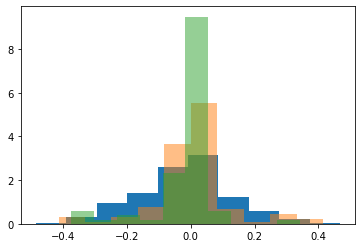

In [11]:
plt.hist(asy_L, density=True)
plt.hist(asy[erq0], density=True, alpha=0.5)
plt.hist(asy[erq1], density=True, alpha=0.5)
plt.show()

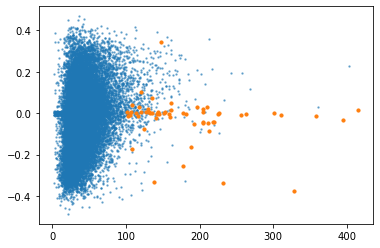

In [12]:
# %matplotlib
# mask=((asy<0.01) & (asy>-.01))
plt.scatter(rew_L, asy_L, alpha=0.5, s=2)
erq_nobal = (iw3>=4.6) & (rew>=100) & (bal==0)
plt.scatter(rew[erq_nobal], asy[erq_nobal], s=10)
plt.show()

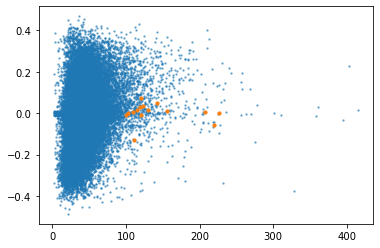

In [13]:
plt.scatter(rew, asy, alpha=0.5, s=2)
erq_bal= (iw3>4.6) & (rew>100) & (bal==1)
plt.scatter(rew[erq_bal], asy[erq_bal], s=10)
plt.show()

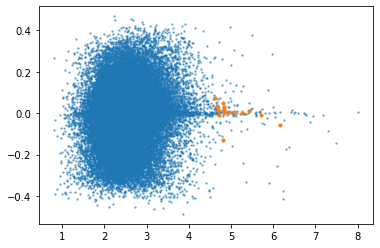

In [14]:
plt.scatter(iw3, asy, alpha=0.5, s=2)
plt.scatter(iw3[erq_bal], asy[erq_bal], s=10)
plt.show()

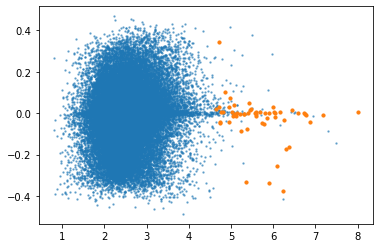

In [15]:
plt.scatter(iw3, asy, alpha=0.5, s=2)
plt.scatter(iw3[erq_nobal], asy[erq_nobal], s=10)
plt.show()

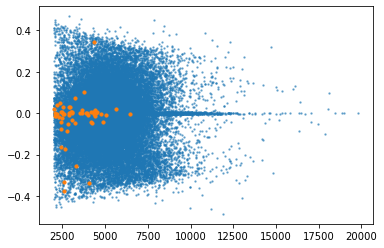

In [16]:
plt.scatter(fwhm, asy, alpha=0.5, s=2)
plt.scatter(fwhm[erq_nobal], asy[erq_nobal], s=10)
plt.show()

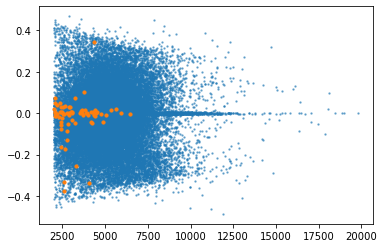

In [17]:
plt.scatter(fwhm, asy, alpha=0.5, s=2)
plt.scatter(fwhm[erq1], asy[erq1], s=10)
plt.show()

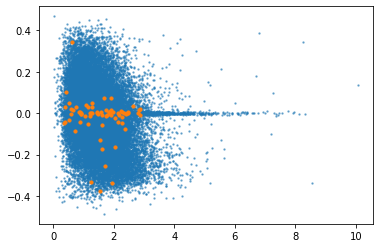

In [18]:
plt.scatter(frat[frat>0], asy[frat>0], alpha=0.5, s=2)
plt.scatter(frat[erq1], asy[erq1], s=10)
plt.show()

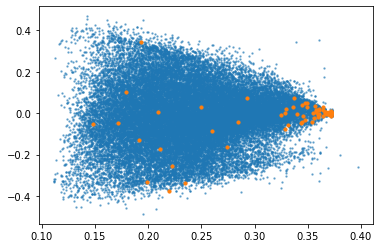

In [19]:
plt.scatter(kt80, asy, alpha=0.5, s=2)
plt.scatter(kt80[erq1], asy[erq1], s=10)
plt.show()

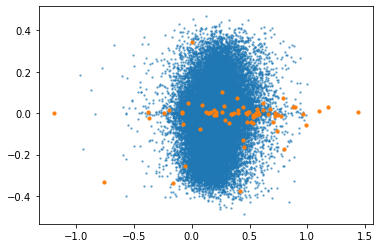

In [20]:
plt.scatter(iz[(-1<iz) & (iz<1)], asy[(-1<iz) & (iz<1)], alpha=0.5, s=2)
plt.scatter(iz[erq1], asy[erq1], s=10)
plt.show()

3.0
524


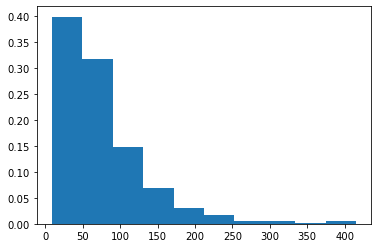

In [21]:
mask = iw3>4
x= rew[mask]
p,bins, patches = plt.hist(x)
print(p[-1])
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

319


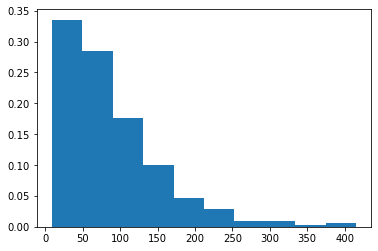

In [22]:
mask = iw3>4.2
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

233


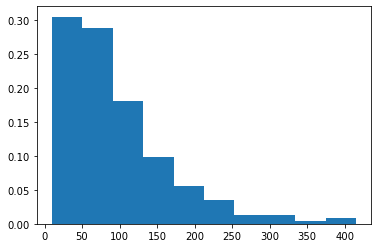

In [23]:
mask = iw3>4.4
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

161


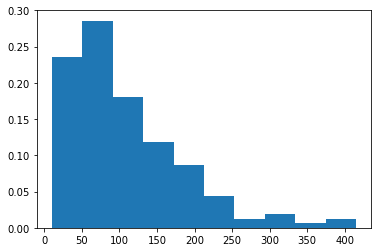

In [24]:
mask = iw3>4.6
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

114


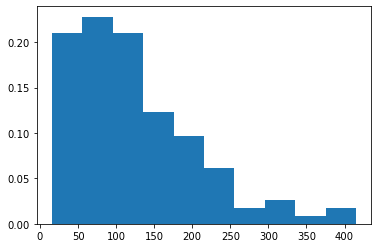

In [25]:
mask = iw3>4.8
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

86


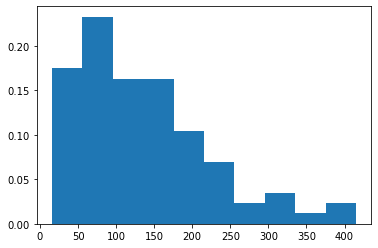

In [26]:
mask = iw3>5
x= rew[mask]
p,bins, patches = plt.hist(x)
pdf=p/sum(p)
plt.clf()
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.bar(med_bin, pdf, width)
print(sum(mask))
# print(p,bins, patches)

In [27]:
(4.6 - np.mean(iw3))/np.std(iw3)

3.6895491644042524

In [28]:
(100 - np.mean(rew))/np.std(rew)

2.593095284617854

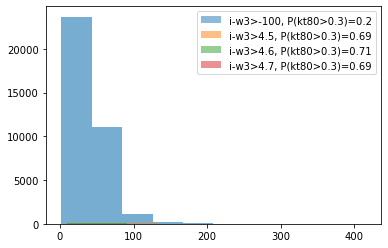

In [29]:
plt.clf()
for c in [-100, 4.5, 4.6, 4.7]:
    mask = iw3>c
    x= rew[mask]
    p,bins, patches = plt.hist(x, alpha=0.6)
    pdf=p/sum(p)
  
    med_bin = (bins[:-1] + bins[1:])/2
    width = bins[1] - bins[0]
    plt.bar(med_bin, pdf, width, label='i-w3>'+str(c) + ', P(kt80>0.3)=' + str(round(sum(kt80[mask]>0.3)/sum(mask),2)), alpha=0.5)
plt.legend()

plt.show()
    

In [30]:
(0.33 - np.mean(kt80))/np.std(kt80)

1.4421015824383285

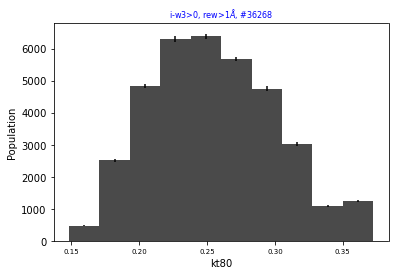

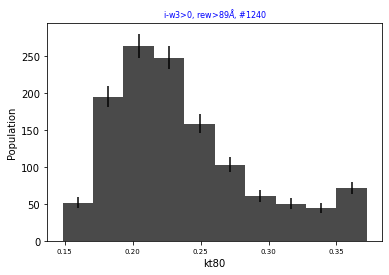

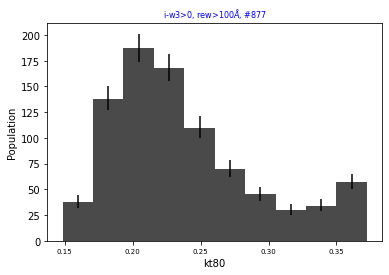

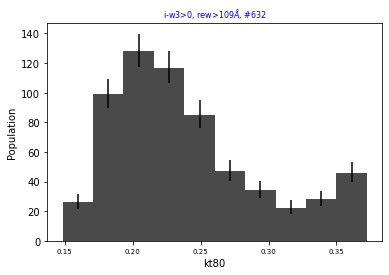

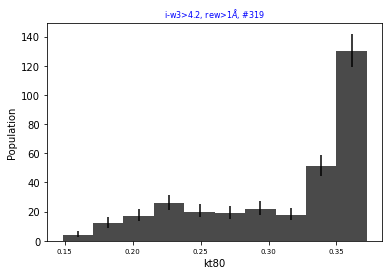

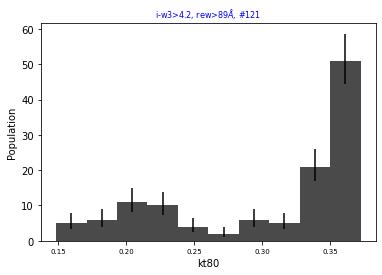

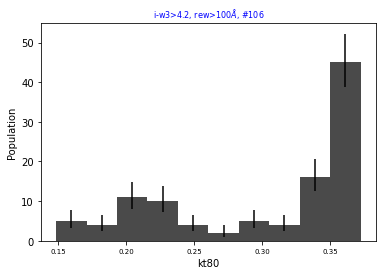

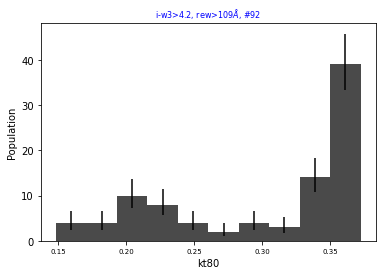

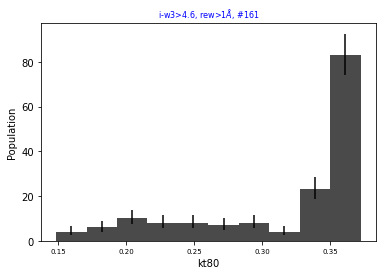

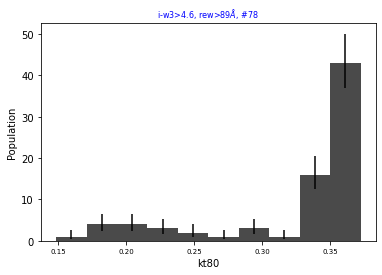

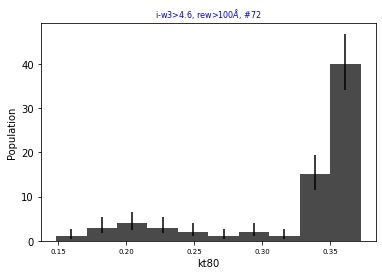

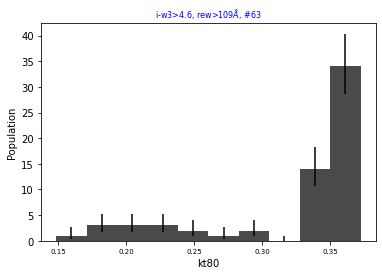

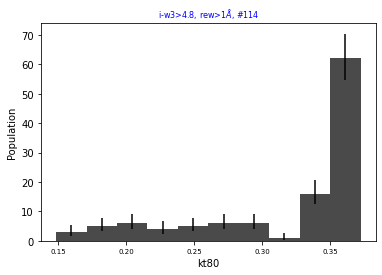

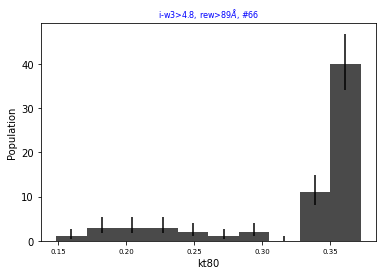

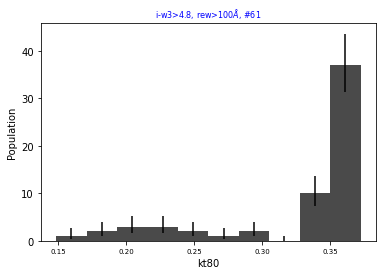

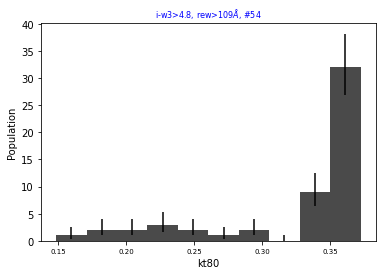

In [100]:
pdf=np.zeros([4,4,10])
ErrLowpdf=np.zeros([4,4,10])
ErrUppdf=np.zeros([4,4,10])
i=-1
# R0 = [0,]
R = [0, np.log10(90),2,np.log10(110)]
C = [0, 4.2, 4.6, 4.8]
for c in C:
    i+=1
    j=-1
    for r in R:
        j+=1
        mask = (iw3>c) & (np.log10(rew)>r)
        x = kt80[mask]
        p, bins, patches = plt.hist(x, alpha=0.6, bins=10)
        pdf[i,j,:] =p
        for  k in range(10):
            ErrLowpdf[i,j,k] = -0.5 + np.sqrt(p[k]+0.25) #(np.std(x[(x>=bins[k]) & (x<=bins[k+1])]))
            ErrUppdf[i,j,k] = 0.5 + np.sqrt(p[k]+0.25) #(np.std(x[(x>=bins[k]) & (x<=bins[k+1])]))

  
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.clf()
# fig, axes = plt.subplots(sharex=True, sharey=True, ncols=4,
#                          nrows=4)
i=-1
for c in C:
    i+=1
    j=-1
    for r in R:
        j+=1
#         if i<j:
#             axes[i,j].axis('off')
#         else:

#         axes[i,j].bar(med_bin, pdf[i,j,:], width, alpha=0.6, color='green')
#         axes[i,j].bar(med_bin, pdf[i,j,:], width=width, yerr= Errpdf[i,j,:],  color='red')
        plt.bar(med_bin, pdf[i,j,:], width=width,  color='dar',yerr=[ErrLowpdf[i,j,:], ErrUppdf[i,j,:]],  alpha=.71)
    

        title = 'i-w3>'+str(c) +', rew>'+str(np.int32(10**r)) +r'$\AA$, #'+str(sum((iw3>c)&(np.log10(rew)>r)))
        plt.title(title, fontsize=8, color='blue')
        plt.rc('xtick', labelsize=7)    # fontsize of the tick labels
        plt.xlabel('kt80')
        plt.ylabel('Population')
        plt.savefig('iw3>'+str(c)+'rew>'+str(int(10**r))+'.png', dpi=400) 
        plt.show()
# fig.text(0.01, 0.5, 'P(kt80|i-w3>c,rew>r)', rotation='vertical', va='center')
# # fig.text(0.5, 0.04, 'kt80', ha='center')
# # axes.set_ylabel('ratio')
# # plt.ylim(0,0.61)
# plt.savefig('rew-color-dist.png', dpi=1800)
# plt.show()

In [34]:
Errpdf

array([[[0.00029787, 0.00015682, 0.00011776, 0.00010398, 0.00010362,
         0.00010902, 0.00012077, 0.00014576, 0.00022648, 0.        ],
        [0.00092992, 0.00048514, 0.00044425, 0.00045629, 0.00062716,
         0.0006224 , 0.00091409, 0.0010813 , 0.00109413, 0.        ],
        [0.00122812, 0.00054374, 0.00051781, 0.00053315, 0.00074898,
         0.00072234, 0.00097932, 0.0014679 , 0.00129593, 0.        ],
        [0.00137242, 0.00062023, 0.00061587, 0.00065497, 0.00084578,
         0.00091334, 0.00110144, 0.00171713, 0.00141794, 0.        ]],

       [[0.00387506, 0.00196636, 0.00147246, 0.00154394, 0.00147408,
         0.00150226, 0.00170043, 0.0018681 , 0.00104589, 0.        ],
        [0.00327208, 0.00260874, 0.00184406, 0.00183702, 0.00248567,
         0.00287882, 0.00231316, 0.00288235, 0.00151211, 0.        ],
        [0.00327208, 0.00346421, 0.00184406, 0.00183702, 0.00248567,
         0.00287882, 0.00176569, 0.00279956, 0.00179499, 0.        ],
        [0.00403377, 0.00

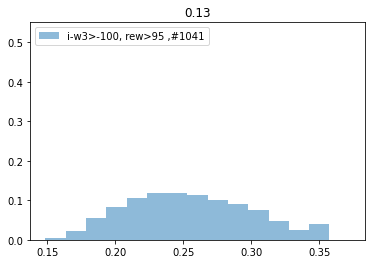

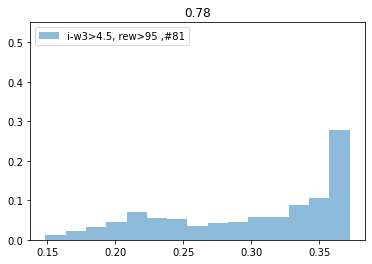

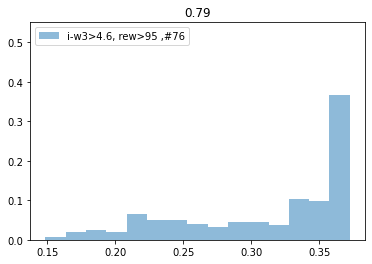

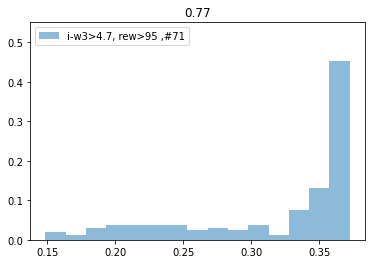

In [35]:
pdf=np.zeros([5,6,15])
i=-1
for c in [-100, 4, 4.2, 4.6, 4.8]:
    i+=1
    j=-1
    for r in [ -100, 90, 95, 100, 105, 110]:
        j+=1
        mask = (iw3>c) & (rew>r)
        x= kt80[mask]
        p,bins, patches = plt.hist(x, alpha=0.6, bins=15)
        pdf[i,j,:] =p/sum(p)

  
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.clf()
i=-1
for c in [-100,4.5, 4.6, 4.7]:
    i+=1
    j=-1
    for r in [95]:#, 95, 100, 105, 110]:
        j+=1
        plt.bar(med_bin, pdf[i,j,:], width, label='i-w3>'+str(c) + ', rew>'+str(r)+' ,#'+str(sum((iw3>c)&(rew>r))), alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylim(0,0.55)
        plt.title(round(sum(kt80[(iw3>c)&(rew>r)]>0.3)/sum((iw3>c)&(rew>r)),2))
#         plt.savefig('iw3'+str(c)+'rew'+str(r)+'.png', dpi=400)
        plt.show()

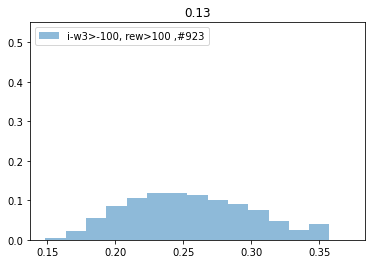

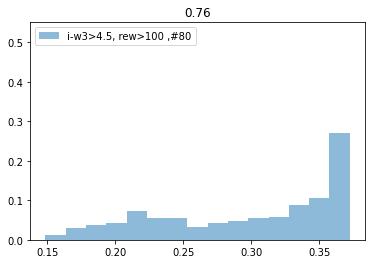

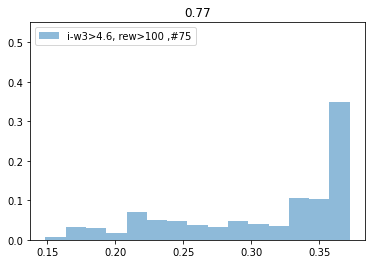

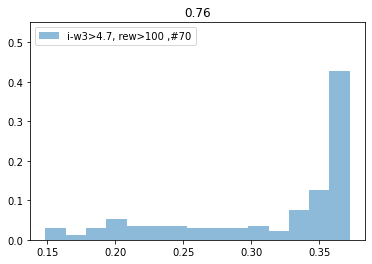

In [80]:
pdf=np.zeros([5,6,15])
i=-1
for c in [-100, 4, 4.2, 4.6, 4.8]:
    i+=1
    j=-1
    for r in [ -100, 90, 95, 100, 105, 110]:
        j+=1
        mask = (iw3>c) & (rew>r)
        x= kt80[mask]
        p,bins, patches = plt.hist(x, alpha=0.6, bins=15)
        pdf[i,j,:] =p/sum(p)

  
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.clf()
i=-1
for c in [-100,4.5, 4.6, 4.7]:
    i+=1
    j=-1
    for r in [100]:#, 95, 100, 105, 110]:
        j+=1
        plt.bar(med_bin, pdf[i,j,:], width, label='i-w3>'+str(c) + ', rew>'+str(r)+' ,#'+str(sum((iw3>c)&(rew>r))), alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylim(0,0.55)
        plt.title(round(sum(kt80[(iw3>c)&(rew>r)]>0.3)/sum((iw3>c)&(rew>r)),2))
#         plt.savefig('iw3'+str(c)+'rew'+str(r)+'.png', dpi=400)
        plt.show()

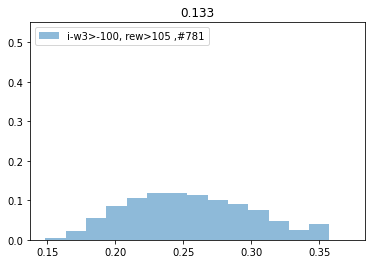

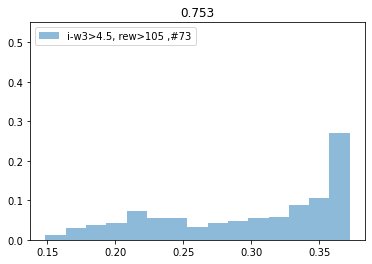

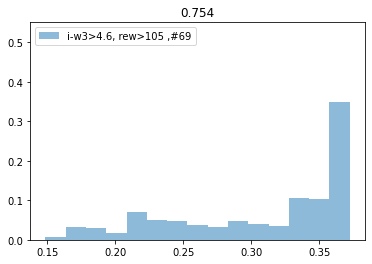

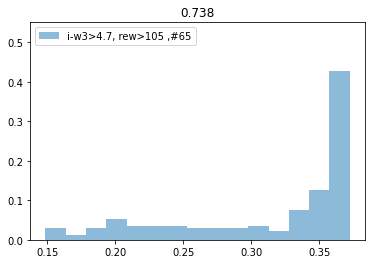

In [81]:
pdf=np.zeros([5,6,15])
i=-1
for c in [-100, 4, 4.2, 4.6, 4.8]:
    i+=1
    j=-1
    for r in [ -100, 90, 95, 100, 105, 110]:
        j+=1
        mask = (iw3>c) & (rew>r)
        x= kt80[mask]
        p,bins, patches = plt.hist(x, alpha=0.6, bins=15)
        pdf[i,j,:] =p/sum(p)

  
med_bin = (bins[:-1] + bins[1:])/2
width = bins[1] - bins[0]
plt.clf()
i=-1
for c in [-100,4.5, 4.6, 4.7]:
    i+=1
    j=-1
    for r in [105]:#, 95, 100, 105, 110]:
        j+=1
        plt.bar(med_bin, pdf[i,j,:], width, label='i-w3>'+str(c) + ', rew>'+str(r)+' ,#'+str(sum((iw3>c)&(rew>r))), alpha=0.5)
        plt.legend(loc='upper left')
        plt.ylim(0,0.55)
        plt.title(round(sum(kt80[(iw3>c)&(rew>r)]>0.3)/sum((iw3>c)&(rew>r)),3))
#         plt.savefig('iw3'+str(c)+'rew'+str(r)+'.png', dpi=400)
        plt.show()

In [264]:
xx

array([[4. , 4.5, 5. , 5.5, 6. ],
       [4. , 4.5, 5. , 5.5, 6. ],
       [4. , 4.5, 5. , 5.5, 6. ],
       [4. , 4.5, 5. , 5.5, 6. ],
       [4. , 4.5, 5. , 5.5, 6. ]])

100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


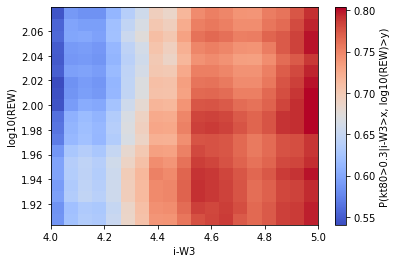

100%|██████████| 20/20 [00:29<00:00,  1.50s/it]


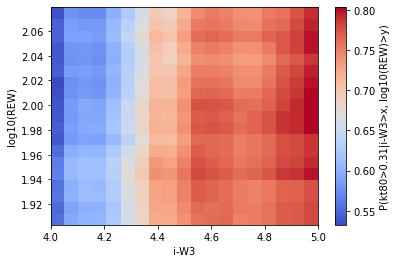

100%|██████████| 20/20 [00:29<00:00,  1.45s/it]


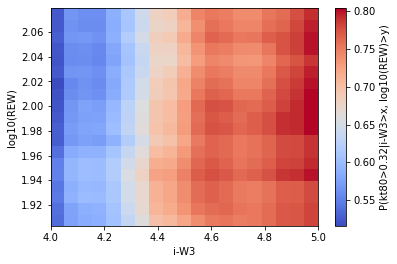

100%|██████████| 20/20 [00:30<00:00,  1.51s/it]


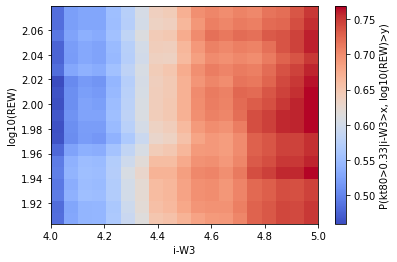

In [273]:
from tqdm import tqdm
N=20
c=np.linspace(4,5,N)
r=np.linspace(np.log10(80),np.log10(120),N)

P_cond_kt80 = np.zeros([N,N])
support_P_cond_kt80 = np.zeros([N,N])
Kt80_tr=[0.3, 0.31, 0.32, 0.33]
for kt80_tr in Kt80_tr:
    i=-1
    
    for rew_tr in tqdm(r):
        i+=1
        j=-1
        for iw3_tr in c:
            j+=1
            mask = (iw3>iw3_tr) & (np.log10(rew)>rew_tr)
            P_cond_kt80[i,j] = sum(kt80[mask]>kt80_tr)/sum(mask)
    #         n_and = sum((iw3>iw3_tr) & (rew>rew_tr) & (kt80>kt80_tr))
    #         n_sup = sum((iw3>iw3_tr) & (rew>rew_tr)) + sum(kt80>kt80_tr) - n_and
    #         support_P_cond_kt80[i,j] = n_sup/len(iw3)


    xx,yy=np.meshgrid(c,r)

    p=plt.pcolor(xx, yy, P_cond_kt80, cmap='coolwarm')
    cbar=plt.colorbar(p)
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    cbar.set_label('P(kt80>'+ str(kt80_tr) +'|i-W3>x, log10(REW)>y)')
#     plt.title('#'+str(sum(kt80>kt80_tr)))
    plt.savefig('con_P_kt80-'+str(kt80_tr)+'.png', dpi=1200)
    plt.show()

In [94]:
from tqdm import tqdm
N=5
c=np.linspace(-1,6,N)
r=np.linspace(20,200,N)

i=-1
cosine_P_cond_kt80 = np.zeros([N,N])
for rew_tr in tqdm(r):
    i+=1
    j=-1
    for iw3_tr in c:
        j+=1
        sup_A = sum(kt80>0.3)
        sup_B = sum((iw3>iw3_tr) & (rew>rew_tr))
        cosine_P_cond_kt80[i,j] =  sum((iw3>iw3_tr) & (rew>rew_tr) & (kt80>0.3))/np.sqrt(sup_A*sup_B)

100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


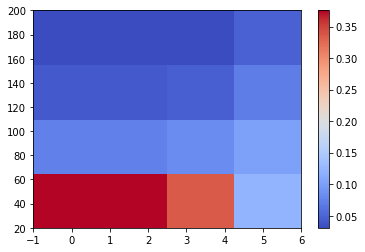

In [95]:
xx,yy=np.meshgrid(c,r)

plt.pcolor(xx,yy,cosine_P_cond_kt80, cmap='coolwarm')
plt.colorbar()
plt.show()

In [91]:
P_cond_kt80[19,19]

IndexError: index 19 is out of bounds for axis 0 with size 5

In [ ]:
np.max(P_cond_kt80)